# Aula 5 - KNN e ferramentas especiais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Viés Variância
- 2) Ferramentas Especiais
- 3) KNN para regressão

## Exercício

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
penguins = sns.load_dataset('penguins')

In [6]:
penguins_cleaned = penguins.dropna()

In [7]:
penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [10]:
X = penguins_cleaned.drop(columns=['island', 'sex', 'species'], axis=1)
y = penguins_cleaned['species']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify = y)

In [12]:
scaler = StandardScaler()

In [13]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [80]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

ks = []
accuracys = []
for k in range(5, 25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)
    acc = accuracy_score(y_test, y_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.title('Acuracia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracys)+5
print('Melhor k:', best_k)

ValueError: Found input variables with inconsistent numbers of samples: [266, 455]

## 1) Viés-Variância

Veremos agora um dos conceitos mais importantes em apredizado de maquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>


## 2) Ferramentas especiais

Vamos agora ver algumas ferramentas especiais do sklearn que nos ajudam no desenvolvimento de modelos!

### Pipeline

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

**Para o train-test split normal**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [67]:
set_config(display='text')

In [22]:
df = pd.read_csv('../datasets/breast_cancer.csv')

X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42,
                                                   stratify = y)

lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())])

In [30]:
y_pred_test = pipe.predict(X_test)

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[71  1]
 [ 4 38]]


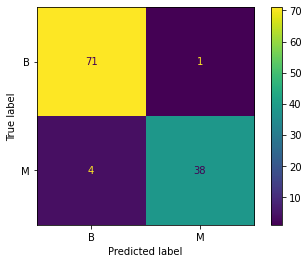

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


# ====================

[[284   1]
 [  9 161]]


C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


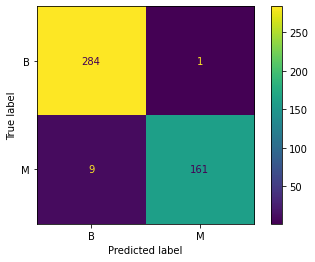

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



In [32]:
print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")


y_pred_train = pipe.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

**Para a validação cruzada**

Isso resolve o problema que tivemos na última aula de vazamento de dados na validação cruzada!

In [39]:
df = pd.read_csv('../datasets/breast_cancer.csv')

X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42,
                                                   stratify = y)

lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

In [50]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate


In [46]:
grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                        X=X, y=y,
                        cv=grupo,
                        scoring=metrica,
                        return_train_score=True)

df_results = pd.DataFrame(results)

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [47]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.003900,0.005098,0.918536,0.950245
std,0.000993,0.000738,0.070757,0.006355
min,0.003000,0.003998,0.736842,0.940860
25%,0.003001,0.004988,0.920769,0.948319
50%,0.003997,0.005000,0.933551,0.948718
75%,0.004012,0.005750,0.948611,0.953109
max,0.005997,0.006000,1.000000,0.962567


Uma boa ideia é usar o [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), pois ele mantém a estratificação do target dentro de cada split!

Isso é sobretudo importante pra dados desbalanceados (no target)

In [59]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [61]:
df = pd.read_csv('../datasets/breast_cancer.csv')

X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42,
                                                   stratify = y)

lista_etapas = [("std_scaler", StandardScaler()),
                ('knn', KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                        X=X_train, y=y_train,
                        cv=grupo,
                        scoring=metrica,
                        return_train_score=True)

df_results = pd.DataFrame(results)

In [62]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.003198,0.003509,0.905882,0.944444
std,0.000915,0.000701,0.096856,0.008850
min,0.002000,0.002999,0.705882,0.934641
25%,0.002971,0.003007,0.838235,0.936275
50%,0.002987,0.003031,0.941176,0.944444
75%,0.003757,0.003989,0.985294,0.947712
max,0.004999,0.005002,1.000000,0.960784


### Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

É muito comum também passarmos o **Pipeline** como argumento do gridsearch!

Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). 

Vamos ver a seguir como esta estrutura funciona:

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

Com a validação cruzada, garantimos uma avaliação justa de cada um dos modelos candidatos (cada um construído com uma combinação diferente de hiperparâmetros).

Assim, sabemos que a melhor combinação de hiperparâmetros a ser encontrada não estará de qualquer forma "overfitada" em particularidades da base de treino!

Vamos colocar tudo em uma única célula:

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

In [88]:
df = pd.read_csv("../datasets/breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 20)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 102 candidates, totalling 1020 fits
[CV 1/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 1/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 2/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 3/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 4/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 5/10; 1/102] EN

[CV 6/10; 6/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 7/10; 6/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 7/10; 6/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 6/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 8/10; 6/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 6/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 9/10; 6/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 6/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform
[CV 10/10; 6/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 1/10; 7/102] START knn__metric=manhattan, knn__n_neighbo

[CV 7/10; 11/102] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 11/102] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 11/102] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 11/102] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 9/10; 11/102] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 11/102] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 10/10; 11/102] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 12/102] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 1/10; 12/102] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 12/102] START knn__metric=manhatta

[CV 10/10; 16/102] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 17/102] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 17/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 17/102] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 17/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 17/102] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 17/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 17/102] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 17/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 17/102] START knn__metric

[CV 4/10; 22/102] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 22/102] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 5/10; 22/102] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 22/102] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 6/10; 22/102] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 22/102] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 7/10; 22/102] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 22/102] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 8/10; 22/102] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 22/102] START knn__metric=manhatta

[CV 6/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 7/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 8/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 9/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 10/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 28/102] START knn__metr

[CV 9/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 32/102] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 10/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 1/10; 33/102] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 33/102] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 33/102] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 33/102] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 33/102] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 33/102] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 33/102] START knn__metric=

[CV 8/10; 37/102] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 37/102] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 9/10; 37/102] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 37/102] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 10/10; 37/102] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 38/102] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 1/10; 38/102] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 38/102] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 2/10; 38/102] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 38/102] START knn__metric=euclidean,

[CV 9/10; 42/102] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 42/102] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 42/102] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 43/102] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 1/10; 43/102] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 43/102] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 2/10; 43/102] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 43/102] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 3/10; 43/102] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 43/102] START knn__metric=euclidean

[CV 2/10; 48/102] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 48/102] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 3/10; 48/102] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 48/102] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 4/10; 48/102] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 48/102] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 48/102] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 48/102] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 48/102] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 7/10; 48/102] START knn__metric=euclidean, knn__n

[CV 3/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 4/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 5/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 6/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 7/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 53/102] START knn__metric

[CV 5/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 6/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 7/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 8/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 9/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 58/102] START knn__metric=euclide

[CV 6/10; 63/102] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 63/102] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 7/10; 63/102] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 63/102] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 8/10; 63/102] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 63/102] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 9/10; 63/102] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 63/102] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 10/10; 63/102] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 64/102] START knn__metr

[CV 8/10; 68/102] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 68/102] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 9/10; 68/102] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 68/102] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 68/102] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 69/102] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance
[CV 1/10; 69/102] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 69/102] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance
[CV 2/10; 69/102] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 69/102] START knn__metric=minkow

[CV 10/10; 73/102] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 74/102] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 1/10; 74/102] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 74/102] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 2/10; 74/102] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 74/102] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 3/10; 74/102] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 74/102] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 4/10; 74/102] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 74/102] START knn__metric=minkowski, knn_

[CV 2/10; 79/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 79/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 3/10; 79/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 79/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 4/10; 79/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 79/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 5/10; 79/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 79/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 79/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 79/102] START knn__metric=minkowsk

[CV 3/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 84/102] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 4/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 84/102] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 5/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 84/102] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 6/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 84/102] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 7/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 84/102] START knn__metric=minkowsk

[CV 3/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 6/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 7/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 89/102] START knn__metric

[CV 6/10; 94/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 94/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 94/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 94/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 94/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 94/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform
[CV 9/10; 94/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 94/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform
[CV 10/10; 94/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 95/102] START knn__metric=minkow

[CV 4/10; 99/102] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 99/102] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 5/10; 99/102] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 6/10; 99/102] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 6/10; 99/102] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 99/102] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 7/10; 99/102] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 99/102] START knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance
[CV 8/10; 99/102] END knn__metric=minkowski, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 99/102] START knn__metric

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [78]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

O GS treinado tem diversos atributos super úteis e interessantes! Vamos dar uma olhada neles:

`.best_estimator_`: retorna quais as escolhas do Pipeline que produziram o melhor modelo. No que diz respeito ao modelo, temos exatamente quais os parâmetros escolhidos!

In [79]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [75]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

`.best_score_`: retorna a **média cross-validada da métrica de interesse** do melhor modelo. Como esse é o valor médio construído usando CV, este é estatisticamente o valor mais realístico a ser atribuído à performance do modelo!

In [70]:
grid_knn.best_score_

0.9411764705882353

`.cv_results_`: diversas informações do processo feito pelo GS

In [73]:
pd.DataFrame(grid_knn.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003997,0.001088,0.003603,0.000652,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
1,0.003417,0.000654,0.002686,0.000633,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
2,0.003891,0.000710,0.003907,0.000693,manhattan,4,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.882353,0.823529,0.764706,1.0,0.941176,0.941176,0.923529,0.079139,13
3,0.003608,0.000673,0.002601,0.000497,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
4,0.004104,0.001379,0.004097,0.001300,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1


Agora, com duas métricas:

In [93]:
df = pd.read_csv("../datasets/breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label="M")
metrica2 = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 20)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring={"recall" :metrica1, "f1" : metrica2},
                        cv=splitter,
                        verbose=10,
                        refit='f1')

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 102 candidates, totalling 1020 fits
[CV 1/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 1/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 2/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 2/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 3/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 1/102] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance
[CV 4/10; 1/102] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/1

[CV 6/10; 5/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 5/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 7/10; 5/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 5/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 8/10; 5/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 5/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 9/10; 5/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 5/102] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance
[CV 10/10; 5/102] END knn__metric=manhattan, knn__n_neighbors=5, knn__w

[CV 1/10; 10/102] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 10/102] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 2/10; 10/102] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 10/102] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 10/102] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 10/102] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 4/10; 10/102] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 5/10; 10/102] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 5/10; 10/102] END knn__metric=manhattan, knn__n_neighbors=7, knn__we

[CV 4/10; 14/102] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 14/102] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 14/102] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 14/102] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 14/102] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 14/102] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 14/102] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 14/102] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 8/10; 14/102] END knn__metric=manhattan, knn__n_neighbors=9, knn__we

[CV 8/10; 18/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 18/102] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 9/10; 18/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 18/102] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 10/10; 18/102] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 19/102] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 1/10; 19/102] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 19/102] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 2/10; 19/102] END knn__metric=manhattan, knn__n_neighbo

[CV 3/10; 23/102] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 4/10; 23/102] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 4/10; 23/102] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 23/102] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 5/10; 23/102] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 23/102] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 6/10; 23/102] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 23/102] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 7/10; 23/102] END knn__metric=manhattan, knn__n_neig

[CV 6/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 7/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 8/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 9/10; 27/102] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 27/102] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 10/10; 27/102] END knn__metric=manhattan, knn__n_ne

[CV 3/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 4/10; 32/102] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 4/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 32/102] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.867) recall: (test=0.765) total time=   0.0s
[CV 6/10; 32/102] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 32/102] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 32/102] END knn__metric=manhattan, knn__n_neighbors=18

[CV 3/10; 36/102] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 36/102] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 4/10; 36/102] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 36/102] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 5/10; 36/102] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 6/10; 36/102] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 6/10; 36/102] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 36/102] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 7/10; 36/102] END knn__metric=euclidean, knn__n_neighbors=3, knn__we

[CV 5/10; 40/102] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 40/102] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 6/10; 40/102] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 40/102] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 7/10; 40/102] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform; f1: (test=0.800) recall: (test=0.706) total time=   0.0s
[CV 8/10; 40/102] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 8/10; 40/102] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 40/102] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 9/10; 40/102] END knn__metric=euclidean, knn__n_neighbors=5, knn__we

[CV 9/10; 44/102] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 44/102] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 10/10; 44/102] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 45/102] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 1/10; 45/102] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 45/102] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 2/10; 45/102] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 45/102] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 3/10; 45/102] END knn__metric=euclidean, knn__n_neighbors=8, 

[CV 3/10; 49/102] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 49/102] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 4/10; 49/102] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 49/102] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 5/10; 49/102] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 49/102] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 6/10; 49/102] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 49/102] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 49/102] END knn__metric=euclidean, knn__n_neig

[CV 6/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 7/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 8/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 53/102] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 53/102] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 53/102] END knn__metric=euclidean, knn__n_ne

[CV 2/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 3/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 4/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 5/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 58/102] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 6/10; 58/102] END knn__metric=euclidean, knn__n_neighbors=14

[CV 5/10; 62/102] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 62/102] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 6/10; 62/102] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 62/102] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 7/10; 62/102] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform; f1: (test=0.800) recall: (test=0.706) total time=   0.0s
[CV 8/10; 62/102] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 62/102] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 62/102] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 9/10; 62/102] END knn__metric=euclidean, knn__n_neighbors=16

[CV 9/10; 66/102] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 10/10; 66/102] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 10/10; 66/102] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 67/102] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 67/102] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 67/102] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 67/102] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 67/102] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 67/102] END knn__metric=euclidean, knn__n_neigh

[CV 5/10; 71/102] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 6/10; 71/102] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 6/10; 71/102] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 71/102] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 7/10; 71/102] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 71/102] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 8/10; 71/102] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 71/102] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=distance
[CV 9/10; 71/102] END knn__metric=minkowski, knn__n_neighbors=4,

[CV 10/10; 75/102] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 1/10; 76/102] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 1/10; 76/102] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 76/102] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 2/10; 76/102] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 76/102] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 3/10; 76/102] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 76/102] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 4/10; 76/102] END knn__metric=minkowski, knn__n_neighbors=6, knn__

[CV 5/10; 80/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 80/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform
[CV 6/10; 80/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 80/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform
[CV 7/10; 80/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform; f1: (test=0.800) recall: (test=0.706) total time=   0.0s
[CV 8/10; 80/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform
[CV 8/10; 80/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 80/102] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=uniform
[CV 9/10; 80/102] END knn__metric=minkowski, knn__n_neighbors=8, knn__we

[CV 9/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 84/102] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 10/10; 84/102] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 85/102] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 85/102] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 85/102] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 85/102] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 85/102] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 85/102] END knn__metric=minkowski, knn__n_neigh

[CV 1/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 89/102] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 89/102] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 89/102] END knn__metric=minkowski, knn__n_neig

[CV 6/10; 93/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 93/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 7/10; 93/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 93/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 8/10; 93/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 93/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 9/10; 93/102] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 93/102] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 93/102] END knn__metric=minkowski, knn__n_ne

[CV 1/10; 98/102] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 98/102] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 2/10; 98/102] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 98/102] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 3/10; 98/102] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 98/102] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 4/10; 98/102] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 98/102] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 5/10; 98/102] END knn__metric=minkowski, knn__n_neighbors=17

[CV 3/10; 102/102] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 102/102] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 4/10; 102/102] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 102/102] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 5/10; 102/102] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 102/102] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 6/10; 102/102] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 102/102] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 7/10; 102/102] END knn__metric=minkowski, knn__n_nei

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, pos_label=M),
                      'recall': make_scorer(recall_score, pos_label=M)},
             verbose=10)

In [83]:
df_results_multi_metric = pd.DataFrame(grid_knn.cv_results_)

In [87]:
#df_results_multi_metric.dtypes

Podemos mudar a métrica segundo a qual otimizaremos os hiperparâmetros!

Aora sim, podemos avaliar a generalização final (base de teste)

[[72  0]
 [ 4 38]]


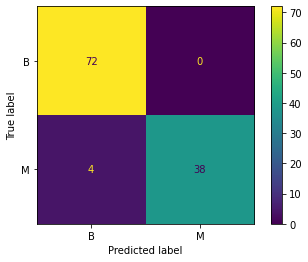

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


# ====================

[[285   0]
 [  0 170]]


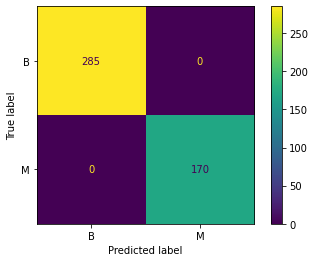

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [89]:
y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

Voltando pro recall:

## Exercício para aula 6

[Dataset de tipos de Vidros](https://www.kaggle.com/datasets/uciml/glass)

In [94]:
## Fazer exploração, preparação, e treinamento de um modelo para classificar tipos de vidro,
## usando o dataset do link acima.
## Explore os dados, faça as limpezas que julgar pertinentes
## Depois Escolha o estimador adequado, faça busca de hiperparametros e crossvalidation
## Não se esqueça de utilizar tratamentos que julgue importantes

## 3) KNN para regressão

O KNN é nosso primeiro exemplo de algoritmo que pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes:

<img src="https://i.stack.imgur.com/gAILq.png" width=500>

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [120]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
df_houses = pd.read_csv("house_prices.csv")
df_houses = df_houses.select_dtypes(include=np.number).dropna()

X = df_houses.drop(columns=["Id", "SalePrice"])
y = df_houses["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [121]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-26932.550 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-23116.539 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-23705.983 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-28354.044 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END

[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-16855.194 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-18972.831 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-19153.093 total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-25155.801 total time=   0.0s
[CV 10/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-19693.371 total time=   0.0s
[CV 1/10; 6/76] START knn__metric=manhattan,

[CV 4/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-25143.407 total time=   0.0s
[CV 5/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 5/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-18584.381 total time=   0.0s
[CV 6/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 6/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-16288.326 total time=   0.0s
[CV 7/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 7/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-18143.223 total time=   0.0s
[CV 8/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 8/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-21120.757 total time=   0.0s
[CV 9/10; 13/76] START knn__metric=ma

[CV 7/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-18815.471 total time=   0.0s
[CV 8/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 8/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-21003.175 total time=   0.0s
[CV 9/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 9/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-23630.922 total time=   0.0s
[CV 10/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 10/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-20393.155 total time=   0.0s
[CV 1/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 1/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=-21727.375 total time=   0.0s
[CV 2/10; 18/76] START k

[CV 6/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-15459.534 total time=   0.0s
[CV 7/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 7/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-18729.182 total time=   0.0s
[CV 8/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 8/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-20963.419 total time=   0.0s
[CV 9/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 9/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-23902.573 total time=   0.0s
[CV 10/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 10/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-20653.865 total time=   0.0s
[CV 1/10; 22/76] START knn

[CV 10/10; 25/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 10/10; 25/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform;, score=-21400.307 total time=   0.0s
[CV 1/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 1/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=-21385.236 total time=   0.0s
[CV 2/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 2/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=-21529.928 total time=   0.0s
[CV 3/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 3/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=-21184.054 total time=   0.0s
[CV 4/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 4/10; 26/76] END knn__metric=manhattan, knn__n_neig

[CV 10/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-20321.953 total time=   0.0s
[CV 1/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 1/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-21790.701 total time=   0.0s
[CV 2/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 2/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-22315.660 total time=   0.0s
[CV 3/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 3/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-22044.760 total time=   0.0s
[CV 4/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 4/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-24745.256 total time=   0.0s
[CV 5/10; 34/76] ST

[CV 4/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-24873.089 total time=   0.0s
[CV 5/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 5/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-20248.482 total time=   0.0s
[CV 6/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 6/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-14431.126 total time=   0.0s
[CV 7/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 7/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-19136.247 total time=   0.0s
[CV 8/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 8/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-21948.561 total time=   0.0s
[CV 9/10; 38/76] ST

[CV 4/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 4/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-29080.903 total time=   0.0s
[CV 5/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 5/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-22645.795 total time=   0.0s
[CV 6/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 6/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-19347.741 total time=   0.0s
[CV 7/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 7/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-23368.583 total time=   0.0s
[CV 8/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 8/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, 

[CV 9/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=-29342.286 total time=   0.0s
[CV 10/10; 46/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 10/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=-23239.199 total time=   0.0s
[CV 1/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 1/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-24521.802 total time=   0.0s
[CV 2/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 2/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-22593.870 total time=   0.0s
[CV 3/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 3/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-22342.587 total time=   0.0s
[CV 4/10; 47/76] START knn__metr

[CV 1/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-24311.797 total time=   0.0s
[CV 2/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 2/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-21932.171 total time=   0.0s
[CV 3/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 3/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-22416.854 total time=   0.0s
[CV 4/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 4/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-25643.101 total time=   0.0s
[CV 5/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 5/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-21398.407 total time=   0.0s
[CV 6/10; 51/76] START knn__metric=eu

[CV 6/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-17705.907 total time=   0.0s
[CV 7/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 7/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-20221.116 total time=   0.0s
[CV 8/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 8/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-24214.122 total time=   0.0s
[CV 9/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 9/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-25591.601 total time=   0.0s
[CV 10/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 10/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-23835.490 total time=   0.0s
[CV 1/10; 56/76] START knn

[CV 3/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-22928.148 total time=   0.0s
[CV 4/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 4/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-25708.229 total time=   0.0s
[CV 5/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 5/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-20631.151 total time=   0.0s
[CV 6/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 6/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-17109.294 total time=   0.0s
[CV 7/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 7/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-20342.703 total time=   0.0s
[CV 8/10; 63/76] START knn__

[CV 4/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-26038.362 total time=   0.0s
[CV 5/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 5/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-21191.384 total time=   0.0s
[CV 6/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 6/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-16333.576 total time=   0.0s
[CV 7/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 7/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-20636.768 total time=   0.0s
[CV 8/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-23939.140 total time=   0.0s
[CV 9/10; 67/76] START knn__

[CV 4/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-27253.030 total time=   0.0s
[CV 5/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-21159.485 total time=   0.0s
[CV 6/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-16537.443 total time=   0.0s
[CV 7/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-20815.148 total time=   0.0s
[CV 8/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-24263.041 total time=   0.0s
[CV 9/10; 71/76] START knn__

[CV 10/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=-23041.397 total time=   0.0s
[CV 1/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 1/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-22595.971 total time=   0.0s
[CV 2/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-23873.095 total time=   0.0s
[CV 3/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-23106.689 total time=   0.0s
[CV 4/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 4/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-26702.380 total time=   0.0s
[CV 5/10; 76/76] ST

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [122]:
grid_knn_reg.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance'}

In [123]:
grid_knn_reg.best_score_

-20297.192189179004

In [124]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.81
MAE: 20875.14
RMSE: 38970.95


Limitando o k, pra fugir de overfitting

In [127]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(50, 100)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 1/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-22931.016 total time=   0.0s
[CV 2/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 2/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-25581.902 total time=   0.0s
[CV 3/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 3/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-25554.409 total time=   0.0s
[CV 4/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 4/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-26511.032 total time=   0.0s
[CV 5/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform

[CV 9/10; 4/100] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-25016.882 total time=   0.0s
[CV 10/10; 4/100] START knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform
[CV 10/10; 4/100] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-23494.428 total time=   0.0s
[CV 1/10; 5/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 1/10; 5/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-23027.075 total time=   0.0s
[CV 2/10; 5/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 2/10; 5/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-25852.305 total time=   0.0s
[CV 3/10; 5/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 3/10; 5/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-25995.309 total time=   0.0s
[CV 4/10; 5/100] START knn

[CV 10/10; 8/100] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-23855.681 total time=   0.0s
[CV 1/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 1/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-23249.918 total time=   0.0s
[CV 2/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 2/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-26049.809 total time=   0.0s
[CV 3/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 3/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-26081.213 total time=   0.0s
[CV 4/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 4/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-26908.737 total time=   0.0s
[CV 5/10; 9/100] START knn_

[CV 9/10; 12/100] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-25457.940 total time=   0.0s
[CV 10/10; 12/100] START knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform
[CV 10/10; 12/100] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-24061.087 total time=   0.0s
[CV 1/10; 13/100] START knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform
[CV 1/10; 13/100] END knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform;, score=-23244.913 total time=   0.0s
[CV 2/10; 13/100] START knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform
[CV 2/10; 13/100] END knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform;, score=-26447.844 total time=   0.0s
[CV 3/10; 13/100] START knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform
[CV 3/10; 13/100] END knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform;, score=-26624.135 total time=   0.0s
[CV 4/10; 13/100]

[CV 10/10; 16/100] END knn__metric=manhattan, knn__n_neighbors=65, knn__weights=uniform;, score=-24225.244 total time=   0.0s
[CV 1/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 1/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-23515.946 total time=   0.0s
[CV 2/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 2/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-26855.659 total time=   0.0s
[CV 3/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 3/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-26910.911 total time=   0.0s
[CV 4/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 4/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-27449.825 total time=   0.0s
[CV 5/10; 17/100] 

[CV 1/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-23475.582 total time=   0.0s
[CV 2/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 2/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27606.608 total time=   0.0s
[CV 3/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 3/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27504.620 total time=   0.0s
[CV 4/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 4/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27580.799 total time=   0.0s
[CV 5/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 5/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-22780.969 total time=   0.0s
[CV 6/10; 25/100] S

[CV 3/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-27990.249 total time=   0.0s
[CV 4/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 4/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-27973.707 total time=   0.0s
[CV 5/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 5/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-23190.067 total time=   0.0s
[CV 6/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 6/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-17580.927 total time=   0.0s
[CV 7/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 7/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-24338.023 total time=   0.0s
[CV 8/10; 29/100] S

[CV 2/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-27622.545 total time=   0.0s
[CV 3/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 3/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-28384.021 total time=   0.0s
[CV 4/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 4/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-28244.763 total time=   0.0s
[CV 5/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 5/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-23277.061 total time=   0.0s
[CV 6/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 6/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-17773.342 total time=   0.0s
[CV 7/10; 33/100] S

[CV 9/10; 40/100] END knn__metric=manhattan, knn__n_neighbors=89, knn__weights=uniform;, score=-26745.156 total time=   0.0s
[CV 10/10; 40/100] START knn__metric=manhattan, knn__n_neighbors=89, knn__weights=uniform
[CV 10/10; 40/100] END knn__metric=manhattan, knn__n_neighbors=89, knn__weights=uniform;, score=-25336.539 total time=   0.0s
[CV 1/10; 41/100] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 1/10; 41/100] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-23780.244 total time=   0.0s
[CV 2/10; 41/100] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 2/10; 41/100] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-27956.544 total time=   0.0s
[CV 3/10; 41/100] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 3/10; 41/100] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-28727.204 total time=   0.0s
[CV 4/10; 41/100]

[CV 9/10; 44/100] START knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform
[CV 9/10; 44/100] END knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform;, score=-26741.427 total time=   0.0s
[CV 10/10; 44/100] START knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform
[CV 10/10; 44/100] END knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform;, score=-25352.468 total time=   0.0s
[CV 1/10; 45/100] START knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform
[CV 1/10; 45/100] END knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform;, score=-23993.383 total time=   0.0s
[CV 2/10; 45/100] START knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform
[CV 2/10; 45/100] END knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform;, score=-28117.240 total time=   0.0s
[CV 3/10; 45/100] START knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform
[CV 3/10; 45/100] END knn__metric=manhattan, knn__n_n

[CV 6/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-18078.710 total time=   0.0s
[CV 7/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 7/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-25091.422 total time=   0.0s
[CV 8/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 8/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-26371.070 total time=   0.0s
[CV 9/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 9/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-26950.622 total time=   0.0s
[CV 10/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 10/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-25569.732 total time=   0.0s
[CV 1/10; 50/100]

[CV 1/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-24164.970 total time=   0.0s
[CV 2/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 2/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-27094.681 total time=   0.0s
[CV 3/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 3/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-27240.875 total time=   0.0s
[CV 4/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 4/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-28907.408 total time=   0.0s
[CV 5/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 5/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-22613.173 total time=   0.0s
[CV 6/10; 54/100] S

[CV 10/10; 57/100] END knn__metric=euclidean, knn__n_neighbors=56, knn__weights=uniform;, score=-26012.027 total time=   0.0s
[CV 1/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 1/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-24623.204 total time=   0.0s
[CV 2/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 2/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-27694.425 total time=   0.0s
[CV 3/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 3/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-27550.141 total time=   0.0s
[CV 4/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 4/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-29050.192 total time=   0.0s
[CV 5/10; 58/100] 

[CV 4/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-29398.445 total time=   0.0s
[CV 5/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 5/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-23367.501 total time=   0.0s
[CV 6/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 6/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-18034.030 total time=   0.0s
[CV 7/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 7/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-24455.105 total time=   0.0s
[CV 8/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 8/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-26613.213 total time=   0.0s
[CV 9/10; 62/100] S

[CV 5/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-23650.176 total time=   0.0s
[CV 6/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 6/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-17883.280 total time=   0.0s
[CV 7/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 7/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-24570.908 total time=   0.0s
[CV 8/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 8/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-26814.513 total time=   0.0s
[CV 9/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 9/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-28462.769 total time=   0.0s
[CV 10/10; 66/100] 

[CV 10/10; 70/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-26684.977 total time=   0.0s
[CV 1/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 1/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-24452.160 total time=   0.0s
[CV 2/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 2/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-28816.943 total time=   0.0s
[CV 3/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 3/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-28975.978 total time=   0.0s
[CV 4/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 4/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-29768.350 total time=   0.0s
[CV 5/10; 71/100] 

[CV 4/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-29999.024 total time=   0.0s
[CV 5/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 5/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-23940.699 total time=   0.0s
[CV 6/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 6/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-18268.492 total time=   0.0s
[CV 7/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 7/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-24881.652 total time=   0.0s
[CV 8/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 8/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-27012.642 total time=   0.0s
[CV 9/10; 75/100] S

[CV 4/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-30056.176 total time=   0.0s
[CV 5/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 5/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-23983.409 total time=   0.0s
[CV 6/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 6/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-18433.554 total time=   0.0s
[CV 7/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 7/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-24954.945 total time=   0.0s
[CV 8/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 8/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-26772.892 total time=   0.0s
[CV 9/10; 79/100] S

[CV 7/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-25165.584 total time=   0.0s
[CV 8/10; 83/100] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform
[CV 8/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-26914.433 total time=   0.0s
[CV 9/10; 83/100] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform
[CV 9/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-28798.692 total time=   0.0s
[CV 10/10; 83/100] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform
[CV 10/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-26904.482 total time=   0.0s
[CV 1/10; 84/100] START knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform
[CV 1/10; 84/100] END knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform;, score=-24649.476 total time=   0.0s
[CV 2/10; 84/100]

[CV 6/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-18628.473 total time=   0.0s
[CV 7/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 7/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-25441.578 total time=   0.0s
[CV 8/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 8/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-27067.662 total time=   0.0s
[CV 9/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 9/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-28879.464 total time=   0.0s
[CV 10/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 10/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-27066.876 total time=   0.0s
[CV 1/10; 88/100]

[CV 3/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-29507.817 total time=   0.0s
[CV 4/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 4/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-30451.637 total time=   0.0s
[CV 5/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 5/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-24271.785 total time=   0.0s
[CV 6/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 6/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-18709.411 total time=   0.0s
[CV 7/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 7/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-25596.026 total time=   0.0s
[CV 8/10; 92/100] S

[CV 6/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-18914.896 total time=   0.0s
[CV 7/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 7/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-25746.988 total time=   0.0s
[CV 8/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 8/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-27356.100 total time=   0.0s
[CV 9/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 9/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-29184.137 total time=   0.0s
[CV 10/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 10/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-27004.110 total time=   0.0s
[CV 1/10; 97/100]

[CV 7/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-25924.932 total time=   0.0s
[CV 8/10; 100/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 8/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27462.462 total time=   0.0s
[CV 9/10; 100/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 9/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-29337.034 total time=   0.0s
[CV 10/10; 100/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 10/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27010.982 total time=   0.0s


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(50, 100),
                         'knn__weights': ['uniform']},
             scoring='neg_mean_absolute_error', verbose=10)

In [128]:
# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 0.77
MAE: 22564.92
RMSE: 38739.83

Métricas de teste:

R^2: 0.70
MAE: 24995.13
RMSE: 48348.02
